In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [2]:
# load dataset
df = pd.read_csv("pima_indians_diabetes_data.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#split dataset in features and target variable
x_data=df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y_data=df['Outcome']


In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=1) # 70% training and 30% test


In [5]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model2 = dt_model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dt_model2.predict(X_test)

In [6]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6883116883116883


In [10]:
# Measure precision, recall, and f1 score.
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f"The precision of the model is {precision:.2f}.")
print(f"The recall of the model is {recall:.2f}.")
print(f"The F1-score of the model is {f1:.2f}.")

              precision    recall  f1-score   support

           0       0.75      0.80      0.78       146
           1       0.62      0.55      0.58        85

    accuracy                           0.71       231
   macro avg       0.69      0.68      0.68       231
weighted avg       0.70      0.71      0.71       231

The precision of the model is 0.62.
The recall of the model is 0.55.
The F1-score of the model is 0.58.


In [ ]:
# Prepare a provision for a new data entry and its prediction of an outcome.

def predict_diabetes():
    while True:
        try:
            pregnancies = int(input("Enter number of pregnancies: "))
            glucose = int(input("Enter glucose level: "))
            blood_pressure = int(input("Enter blood pressure: "))
            skin_thickness = int(input("Enter skin thickness: "))
            insulin = int(input("Enter insulin level: "))
            bmi = float(input("Enter BMI: "))
            diabetes_pedigree = float(input("Enter diabetes pedigree function: "))
            age = int(input("Enter age: "))

            # Input validation (example: check for non-negative values)
            if any(val < 0 for val in [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]):
                print("Error: Please enter non-negative values for all features.")
                continue  #restart the loop

            new_patient_data = pd.DataFrame([[pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age]],
                                           columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

            prediction = dt_model2.predict(new_patient_data)[0]

            if prediction == 1:
                print("Prediction: Patient is likely to have diabetes.")
            else:
                print("Prediction: Patient is likely not to have diabetes.")

            another_patient = input("Enter data for another patient? (yes/no): ")
            if another_patient.lower() != 'yes':
                break #exit loop
        except ValueError:
            print("Invalid input. Please enter valid numerical values.")

predict_diabetes()

# **Visualizing Decision Tree**

In [13]:
!pip install graphviz
!pip install pydotplus
!pip install six

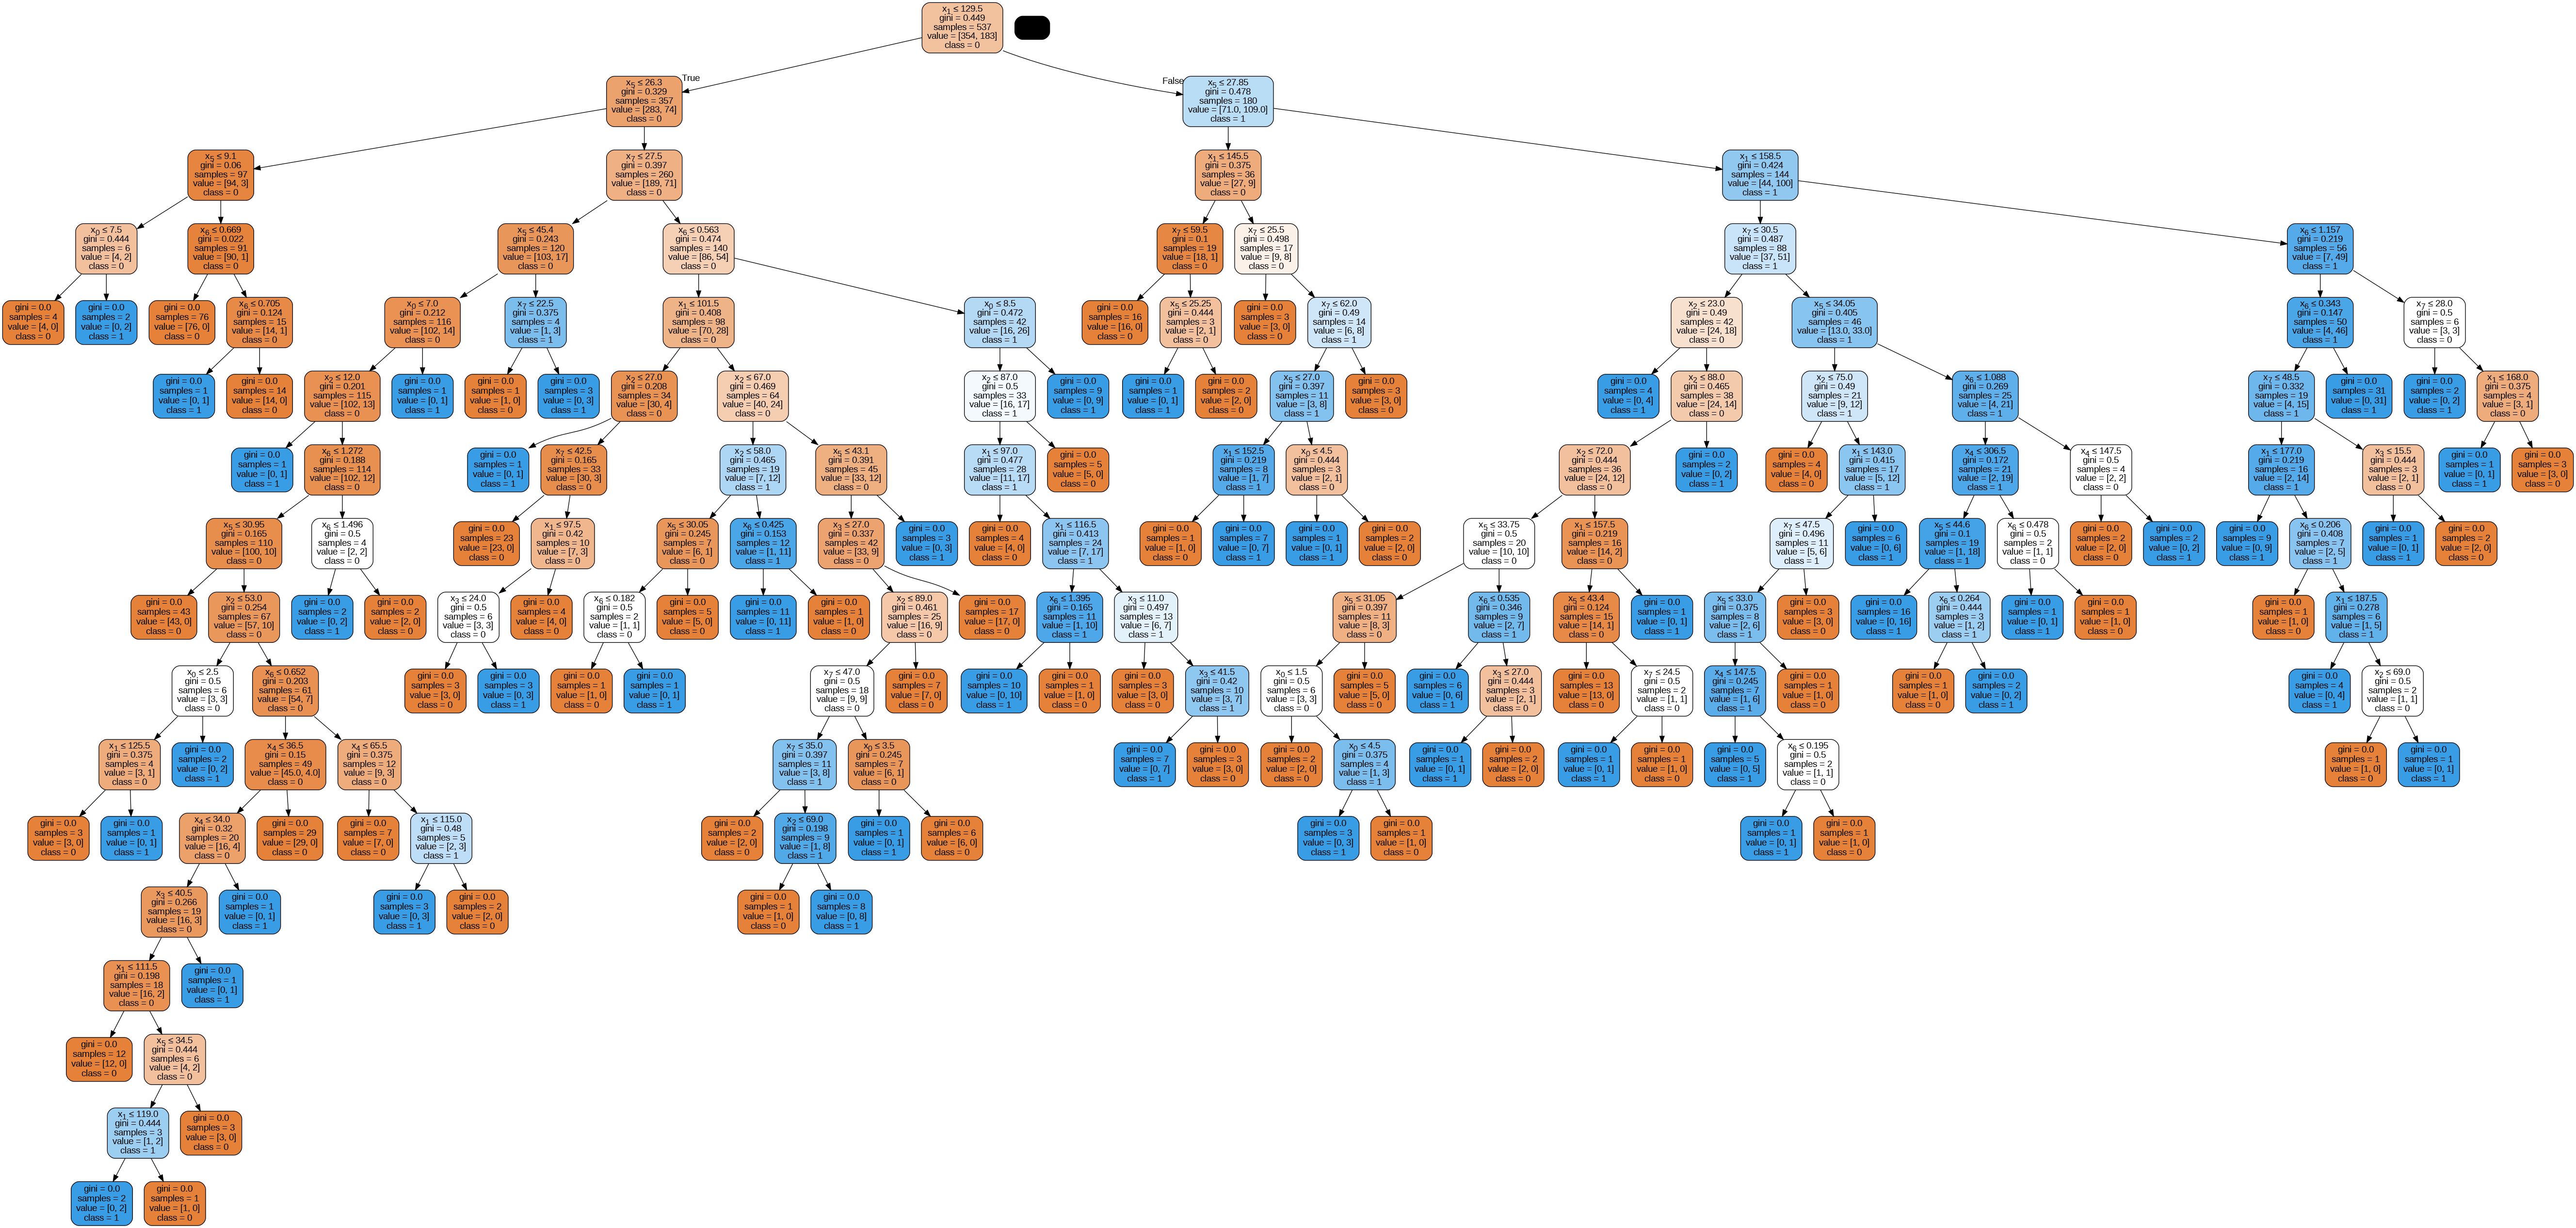

In [15]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


dot_data = StringIO()
export_graphviz(dt_model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())